<a href="https://colab.research.google.com/github/mozzaquatro/financial_market/blob/main/02_Definindo_intervalos%2C_calculando_e_plotando_m%C3%A9dias_m%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

!pip install --upgrade mplfinance
import mplfinance as mpf

#!pip install mpl_finance --upgrade --no-cache-dir
#from mpl_finance import candlestick_ohlc

obtendo os dados do mercado

In [ ]:
ticket = yf.Ticker('USIM5.SA')
#ibov = web.get_data_yahoo(ticket)
#print(ibov.shape)
##print(ticket.info)
data = ticket.history(period='300d')
data
data.columns = map(str.lower, data.columns)
data

TypeError: ignored

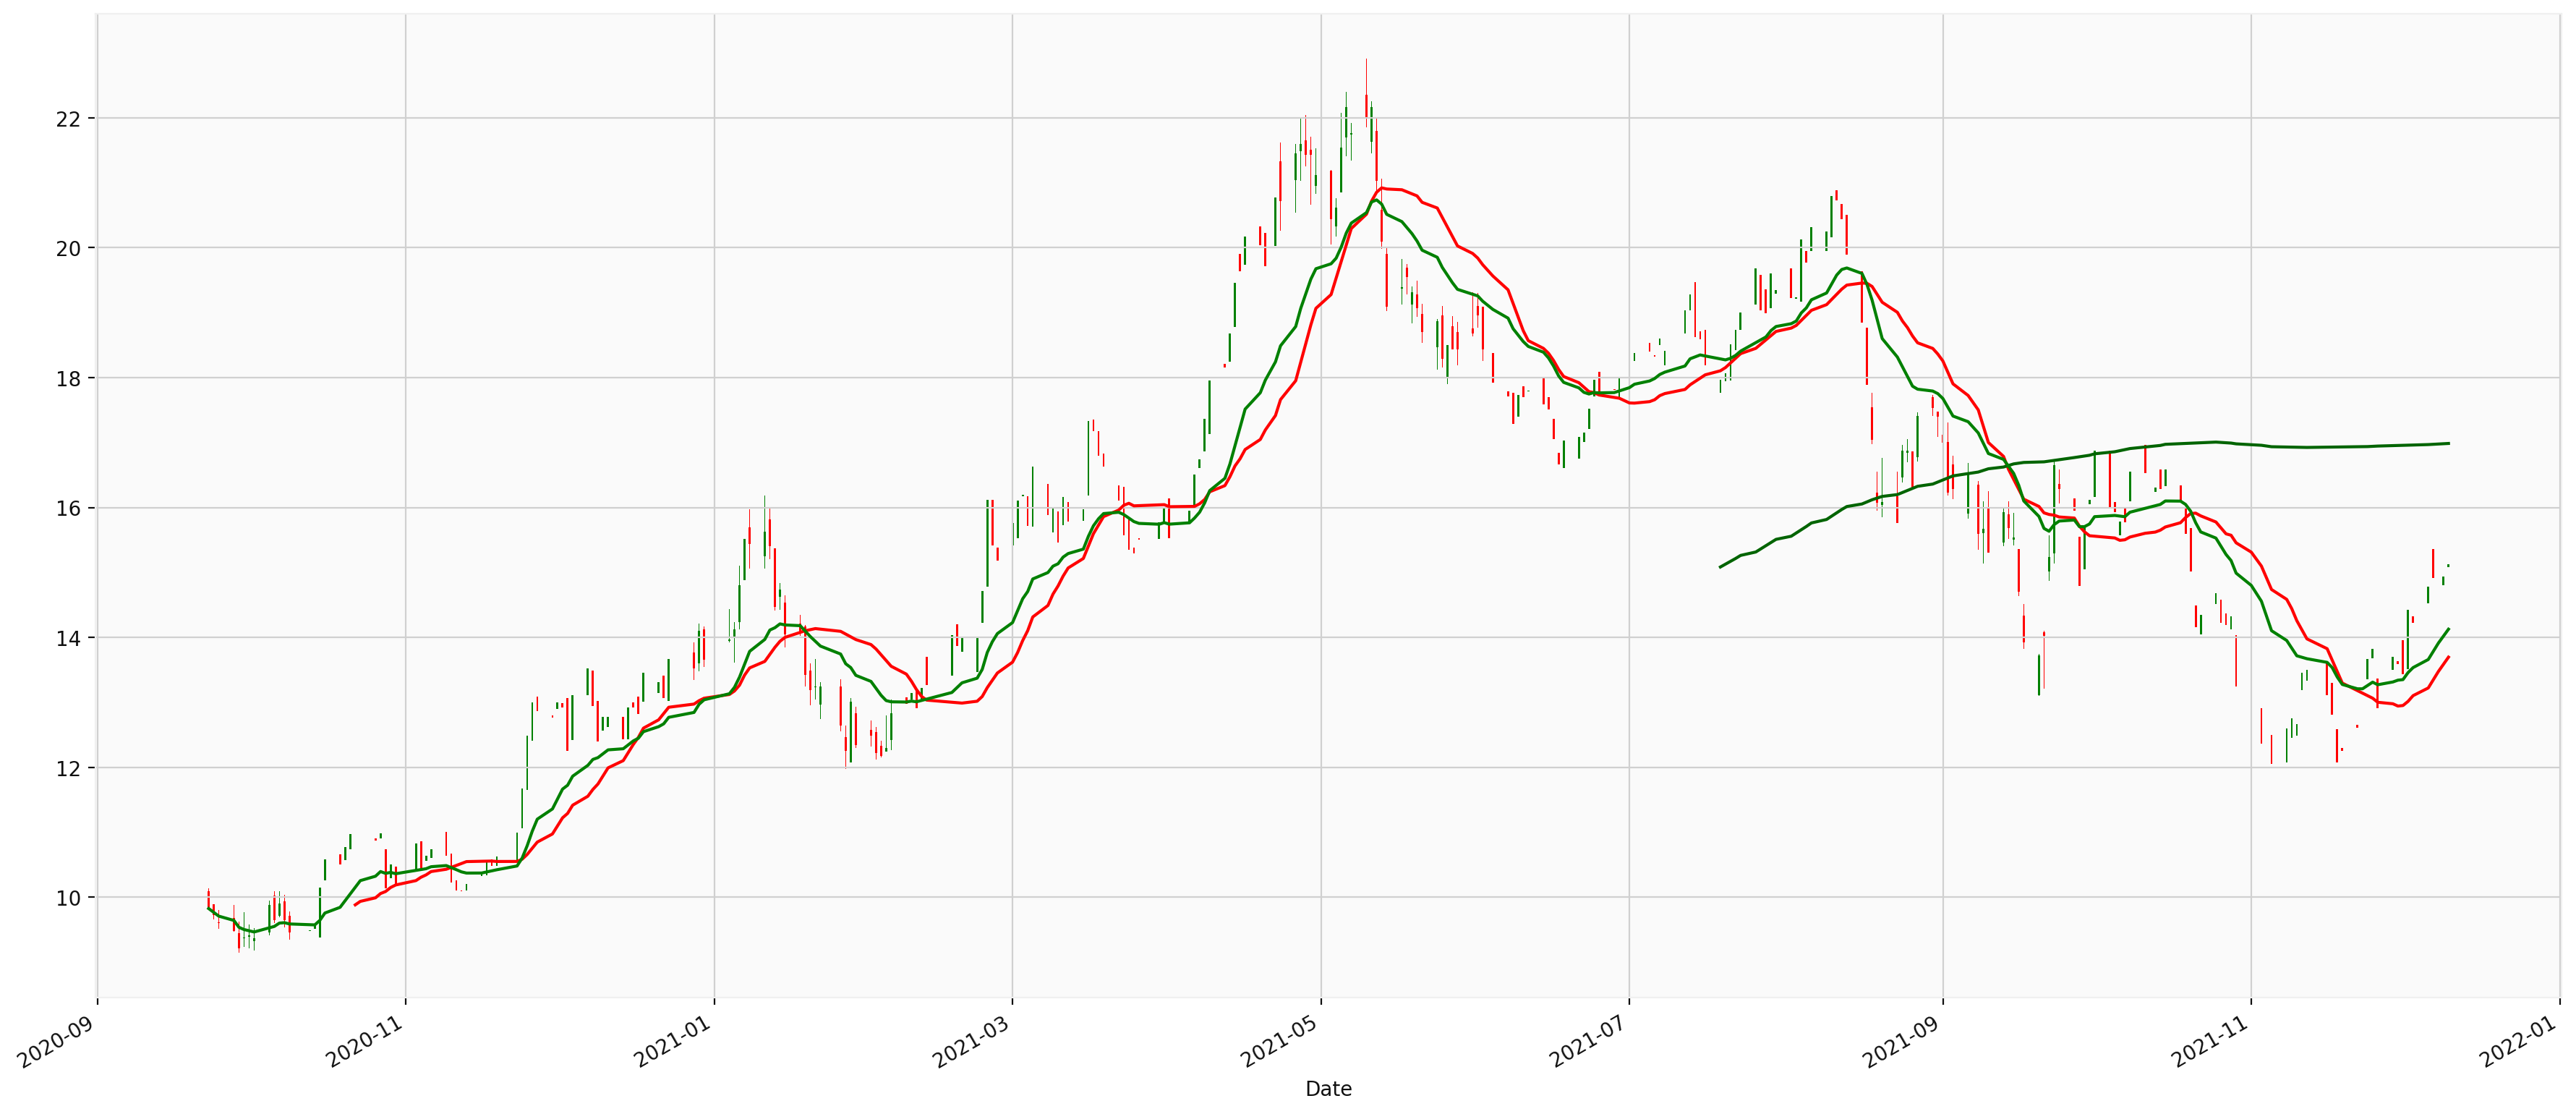

In [165]:
#create figure
plt.figure(figsize=(22,10),dpi=200)

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = data[data.close>=data.open]
down = data[data.close<data.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index,down.high-down.open,width2,bottom=down.open,color=col2)
plt.bar(down.index,down.low-down.close,width2,bottom=down.close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')


#média aritmetica
mma21 = data.close.rolling(21).mean().plot(label="MMA21",color="red")
mma200 = data.close.rolling(200).mean().plot(label="MMA200", color="darkgreen")
#media exponencial
mme9 = data.close.ewm(9).mean().plot(label="MME9", color="green")


intersection

#legenda
plt.legend()

#display candlestick chart
plt.show()


# 
plt.fill( data.close.rolling(21).mean() , data.close.ewm(9).mean())
#plt.fill (mma21,mme9)




In [ ]:


data["Close"].plot(figsize=(24,8),label="IBOV")
data["Close"].rolling(21).mean().plot(label="MM21")
data["Close"].rolling(200).mean().plot(label="MM200")
data['Close'].ewm(9).mean().plot(label="EWM9")
plt.legend()


In [ ]:
mpf.plot(data,type='candle',mav=(20, 200),volume=True,style='yahoo')

In [ ]:
ibov_fatiado = ibov[ibov.index.year == 2020]
ibov_fatiado["Close"].plot(figsize=(22,8),label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [ ]:
ibov_fatiado = ibov[(ibov.index.year >= 2015) & (ibov.index.year <= 2017)]
ibov_fatiado["Close"].plot(figsize=(22,8),label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()